<img src='img/logo.png'>
<img src='img/title.png'>

# Support Vector Machines

The goal of support vector machines is to train a classifier on more features than were supplied.

The expansion techniques used by SVM are more efficient than computing and storing the full interactions, for instance a polynomial expansion of order $n$ in one feature or all possible interactions between $k$ features.

SVM models have been shown to perform well for both low-dimensional and high-dimensional problems.

**Caution**

SVM models are expensive in both time and memory requirements for a large number of observations.

# Table of Contents
* [Support Vector Machines](#Support-Vector-Machines)
* [Setup](#Setup)
* [Linear classification](#Linear-classification)
	* [Decision boundaries](#Decision-boundaries)
* [Nonlinear Kernels](#Nonlinear-Kernels)
	* [Polynomial](#Polynomial)
	* [Radial Basis Function (RBF)](#Radial-Basis-Function-%28RBF%29)
* [Regularization and tuning](#Regularization-and-tuning)
* [Dimensionality](#Dimensionality)


# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import src.mglearn as mglearn
%matplotlib inline

# Linear classification

The LinearSVC model searches for hyperplanes in the feature space that separate the classes.

This is the non-expanded version of SVM.

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
from sklearn.svm import LinearSVC

Like most classification methods this one does well for the iris dataset. 

In [5]:
svc = LinearSVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9210526315789473

## Decision boundaries

Let's look at the sepal dimensions. These have been the most difficult to model.

In [6]:
svc.fit(X_train[:, 0:2], y_train)
svc.score(X_test[:, 0:2], y_test)

0.6578947368421053

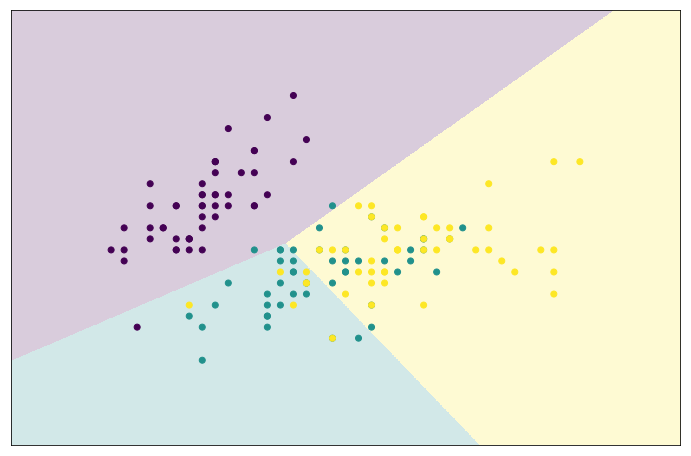

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:, 0], X[:, 1], c=y)
mglearn.plot_2d_separator.plot_2d_classification(svc, X[:, 0:2], alpha=0.2, ax=ax)

# Nonlinear Kernels

By default the SVC model uses a radial basis function (RBF) kernel by default, also called a Gaussian kernel.

Other kernel options include:
* `kernel='rbf'`: default
* `kernel='linear'`: similar to LinearSVC
* `kernel='poly'`: Polynomial decision boundaries of order `degree=<n>`

In [8]:
from sklearn.svm import SVC

## Polynomial

Evaluating all interactions up to order 3 

In [9]:
svc = SVC(kernel='poly', degree=3)
svc.fit(X_train[:, 0:2], y_train)
svc.score(X_test[:, 0:2], y_test)

0.7368421052631579

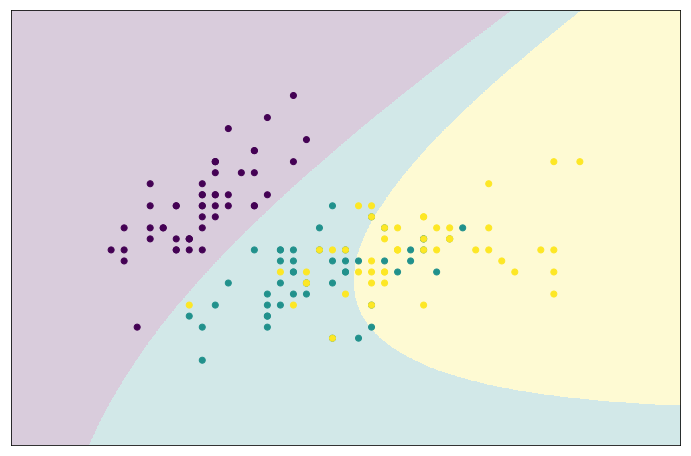

In [10]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:, 0], X[:, 1], c=y)
mglearn.plot_2d_separator.plot_2d_classification(svc, X[:, 0:2], alpha=0.2, ax=ax)

## Radial Basis Function (RBF)

The RBF essentially computes interactions of infinite order.

In [11]:
svc = SVC(kernel='rbf')
svc.fit(X_train[:, 0:2], y_train)
svc.score(X_test[:, 0:2], y_test)

0.7631578947368421

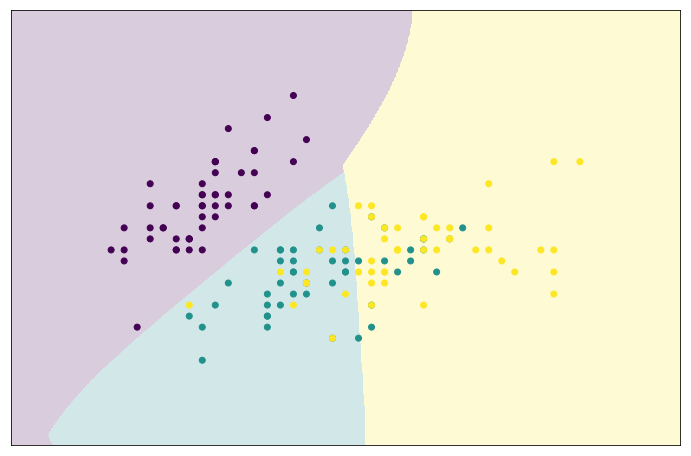

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:, 0], X[:, 1], c=y)
mglearn.plot_2d_separator.plot_2d_classification(svc, X[:, 0:2], alpha=0.2, ax=ax)

The gamma paramter controls the radius of the RBF.
* small gamma means a large radius and leads to underfitting
* large gamma means a small radius and leads to overfitting

In [13]:
svc = SVC(kernel='rbf', gamma=10)
svc.fit(X_train[:, 0:2], y_train)
svc.score(X_test[:, 0:2], y_test)

0.7105263157894737

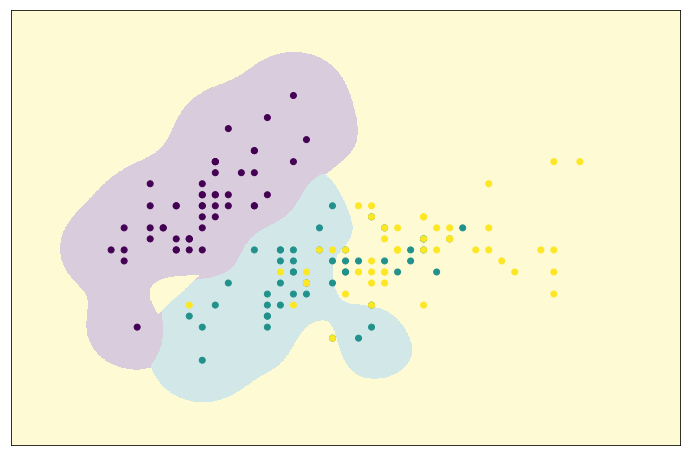

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:, 0], X[:, 1], c=y)
mglearn.plot_2d_separator.plot_2d_classification(svc, X[:, 0:2], alpha=0.2, ax=ax)

# Regularization and tuning

`C` is the regularization parameter:
* larger C is unregulated and may lead to overfitting
* small C is regulated and damps coefficients towards zero.

Typically, C and gamma are varied together for the RBF kernel.

In [ ]:
svc = SVC(kernel='rbf', C=1000, gamma=100)
svc.fit(X_train[:, 0:2], y_train)
svc.score(X_test[:, 0:2], y_test)

By setting the C and gamma parameters to large values, the model has almost memorized the training set.

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:, 0], X[:, 1], c=y)
mglearn.plot_2d_separator.plot_2d_classification(svc, X[:, 0:2], alpha=0.2, ax=ax)

# Dimensionality

The SVM models are very sensitive to the numerical range of the features.

This because of the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality).

More feature dimensions leads to sparsity and an increase in distances between observations.

For this reason it is recommended to scale each feature to the values 0 and 1.

See <a href='Scaling_and_Normalization.ipynb' class='btn btn-sm btn-primary'>Scaling and Normalization</a>

<img src='img/copyright.png'>